In [7]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt

In [3]:
people = fetch_lfw_people(min_faces_per_person=5, resize=0.7) #download

In [4]:
people.target_names

array(['Abdullah Gul', 'Adrien Brody', 'Ahmed Chalabi', 'Ai Sugiyama',
       'Al Gore', 'Al Sharpton', 'Alan Greenspan', 'Alastair Campbell',
       'Albert Costa', 'Alejandro Toledo', 'Ali Naimi', 'Allyson Felix',
       'Alvaro Uribe', 'Amelia Vega', 'Amelie Mauresmo', 'Ana Guevara',
       'Ana Palacio', 'Andre Agassi', 'Andy Roddick', 'Angela Bassett',
       'Angela Merkel', 'Angelina Jolie', 'Ann Veneman',
       'Anna Kournikova', 'Antonio Banderas', 'Antonio Palocci',
       'Ari Fleischer', 'Ariel Sharon', 'Arminio Fraga',
       'Arnold Schwarzenegger', 'Arnoldo Aleman', 'Ashanti',
       'Atal Bihari Vajpayee', 'Ben Affleck', 'Benazir Bhutto',
       'Benjamin Netanyahu', 'Bernard Law', 'Bertie Ahern',
       'Bill Clinton', 'Bill Frist', 'Bill Gates', 'Bill Graham',
       'Bill McBride', 'Bill Simon', 'Billy Crystal',
       'Binyamin Ben-Eliezer', 'Bob Graham', 'Bob Hope', 'Bob Stoops',
       'Boris Becker', 'Brad Johnson', 'Britney Spears', 'Bulent Ecevit',
       'Cal

In [5]:
people.target.shape

(5985,)

In [6]:
len(set(people.target_names)) #set명령어를 통해 중복제거

423

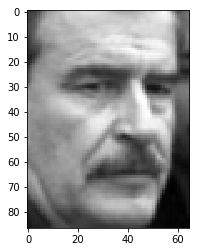

In [8]:
plt.imshow(people.images[0], cmap='gray')

In [19]:
#(87*65) 이상의 명암을 주성분 100(10*10)개 변환해서 시각화
from sklearn.decomposition import PCA
import numpy as np

In [30]:
len(set(people.target))

423

In [32]:
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split

In [33]:
x = people.data
y = people.target
X_train, X_test, y_train, y_test = train_test_split(x,y)

In [37]:
model = RidgeClassifier(alpha = 10).fit(X_train, y_train)

C:\Users\wtime\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:165: LinAlgWarning: Ill-conditioned matrix (rcond=1.57718e-11): result may not be accurate.
  overwrite_a=False)


In [38]:
model.score(X_train, y_train),model.score(X_test, y_test)

(1.0, 0.06613226452905811)

In [39]:
pca = PCA(n_components = 10*10, whiten=True).fit(people.data)
#whiten이 true이면 정규화되PCA(n_components = 10*10, whiten=True) #whiten이 true이면 정규화됨

In [40]:
pca_x = pca.transform(people.data)

In [41]:
#오버피팅!! PCA해서 다시 분류 도전

In [42]:
X_train, X_test, y_train, y_test = train_test_split(pca_x,y)
model = RidgeClassifier(alpha = 10).fit(X_train, y_train)

In [43]:
model.score(X_train, y_train),model.score(X_test, y_test) #테스트성능이 6%에서 18%로 오름

(0.24420677361853832, 0.18770875083500335)

In [17]:
people.data.shape, pca_x.shape

((5985, 5655), (5985, 100))

In [22]:
img = pca.components_.reshape([-1, 87, 65]) #(주성분수, 높이, 너비)
img.shape

(100, 87, 65)

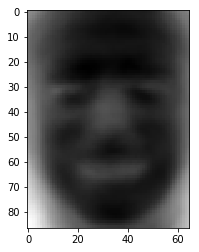

In [24]:
plt.imshow(img[0], cmap='gray')

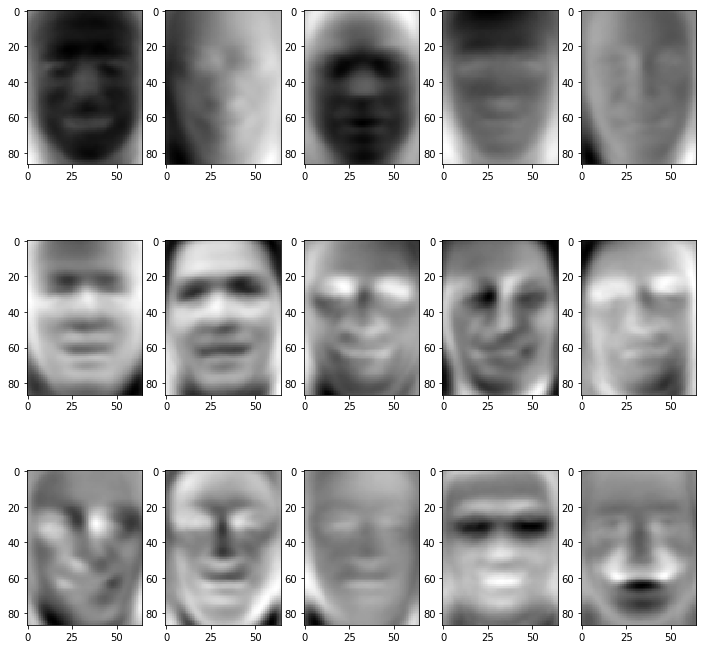

In [28]:
fig, ax = plt.subplots(3,5,figsize=(12,12))
for y in range(3):
    for x in range(5):
        ax[y,x].imshow(img[y*5+x], cmap='gray')